In [26]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

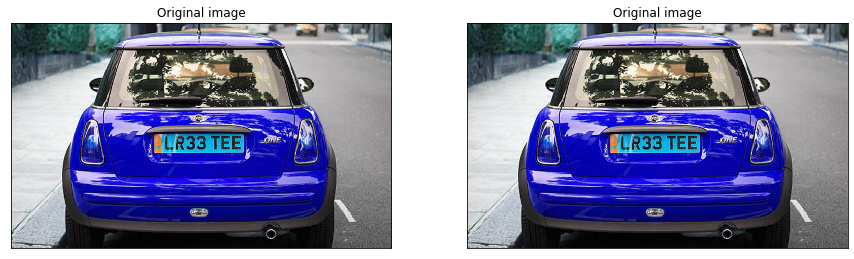

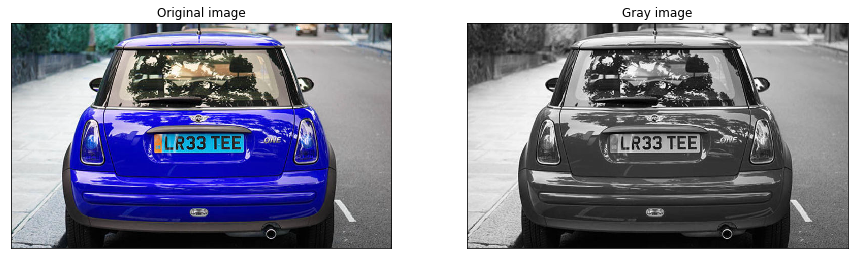

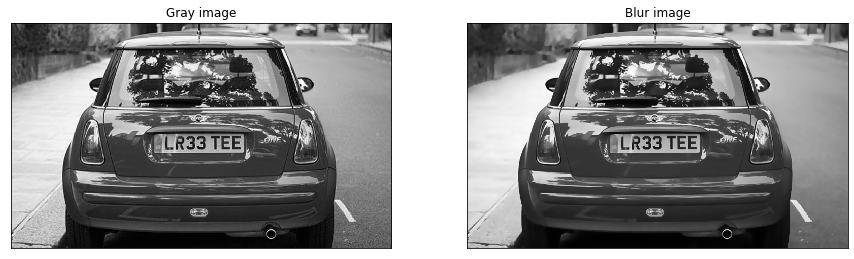

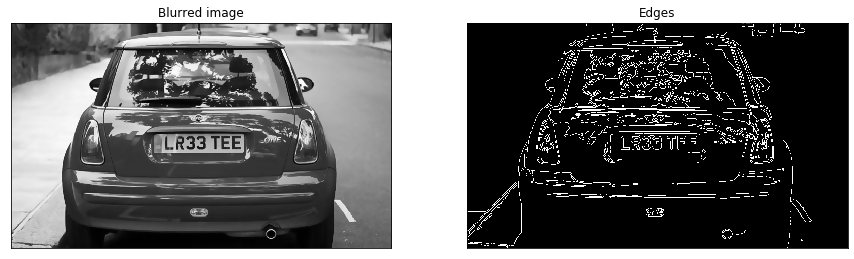

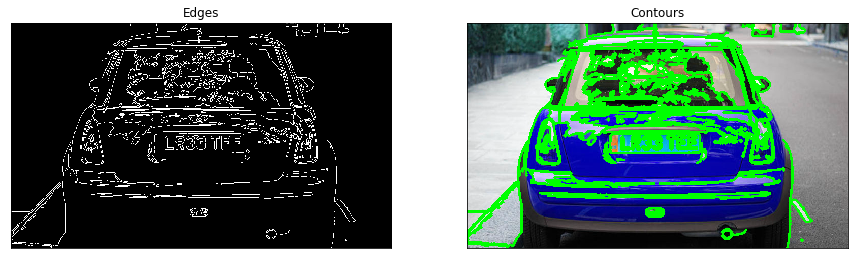

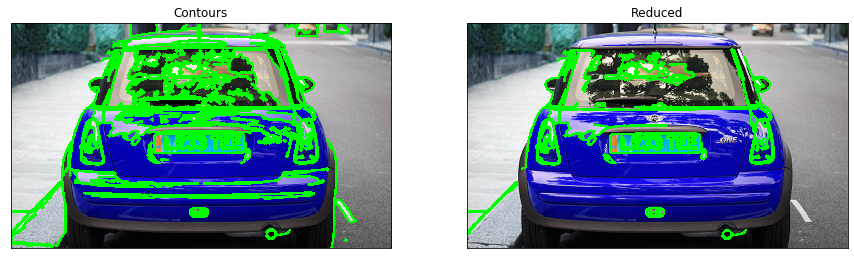

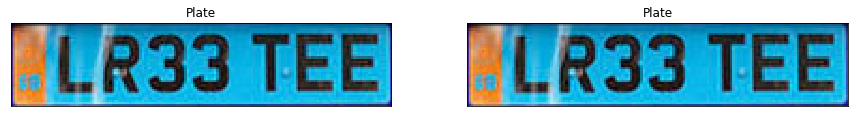

In [27]:
def create_images(img1, img2, title1='', title2=''):
    fig = plt.figure(figsize=[15,15])
    
    ax1 = fig.add_subplot(121) #1 row - 2 columns - targeting the first column
    ax1.imshow(img1, cmap='gray') # converting into gray scale
    ax1.set(xticks=[], yticks=[], title=title1) 
    
    ax2 = fig.add_subplot(122) #1 row - 2 columns - targeting the second column
    ax2.imshow(img2, cmap='gray') # converting into gray scale
    ax2.set(xticks=[], yticks=[], title=title2)
    
path = r'C:\Users\user\Desktop\PlateDetector\Images\car.jpg'
image = cv2.imread(path)
create_images(image, image, 'Original image', 'Original image')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converting our image into gray
create_images(image, gray, 'Original image', 'Gray image')

blur = cv2.bilateralFilter(gray, 11, 17, 17) # Blurring our background
create_images(gray, blur, 'Gray image', 'Blur image')

edges = cv2.Canny(blur, 30, 500)
create_images(blur, edges, 'Blurred image', 'Edges')

cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
drawc = cv2.drawContours(image_copy, cnts, -1, (0,255,0), 3)
create_images(edges, image_copy, 'Edges', 'Contours')

# We have n number of contours, and we wont only the first 50

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:50]
image_reduced_cnts = image.copy()
drawc = cv2.drawContours(image_reduced_cnts, cnts, -1, (0,255,0), 3)
create_images(image_copy, image_reduced_cnts, 'Contours', 'Reduced')

plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c) 
        plate = image[y:y+h, x:x+w]
        break
        
create_images(plate, plate, 'Plate', 'Plate')

